In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining Parameters
L=128            #lENGTH OF PROFILE
Δx=1
n= int(L/Δx)
x= np.arange(0,n,Δx)
x_tangent= np.arange(0,n,0.01)

A=1.0
M=1.0
Κ=1.0

Δt=0.05
T=1000
time=np.arange(0,T,Δt)
count=0

α = M*Δt/Δx**2
β = -2*Κ*Δt / Δx**4

In [3]:
def delf(comp,i):
    return (2*A*comp[i]*(1-comp[i])*(1-2*comp[i]))

def find_tangent_eqn(m,c_prime,a):    
    line_eqn = m + c_prime*(x_tangent-a)
    
    return line_eqn

def find_width(line):
    
    p1=0
    for i in range(int(n/2),-1,-1):
        if line[i] == 1:
            p1 = x[i]
            break
            
    p2 = 0
    for i in range(int(n/2),n,1):
        if line[i]==0:
            p2 = x[i]
            break
    if (p1!=0 and p2!=0):
        return abs(p2-p1)
    
    p1_left,p1_right= 0,0
    v1_left, v1_right= 0,0
    
    for i in range(int(n/2),-1,-1):
        if line[i]<1:
            p1_right = x[i]
            v1_right = line[i]
        if line[i]>1:
            p1_left = x[i]
            v1_left = line[i]
            break
    slope = (v1_right - v1_left) / (p1_right - p1_left)
    p1 = p1_right - (v1_right -1)/slope
            
    p0_left,p0_right= 0,0
    v0_left, v0_right= 0,0
    
    for i in range(int(n/2),n,1):
        if line[i]>0:
            p0_left = x[i]
            v0_left = line[i]
        if line[i]<0:
            p0_right = x[i]
            v0_right = line[i]
            break
            
    slope_0 = (v0_right - v0_left) / (p0_right - p0_left)
    p0 = p0_right - (v0_right - 0)/slope_0
    
    return p0-p1

<IPython.core.display.Javascript object>


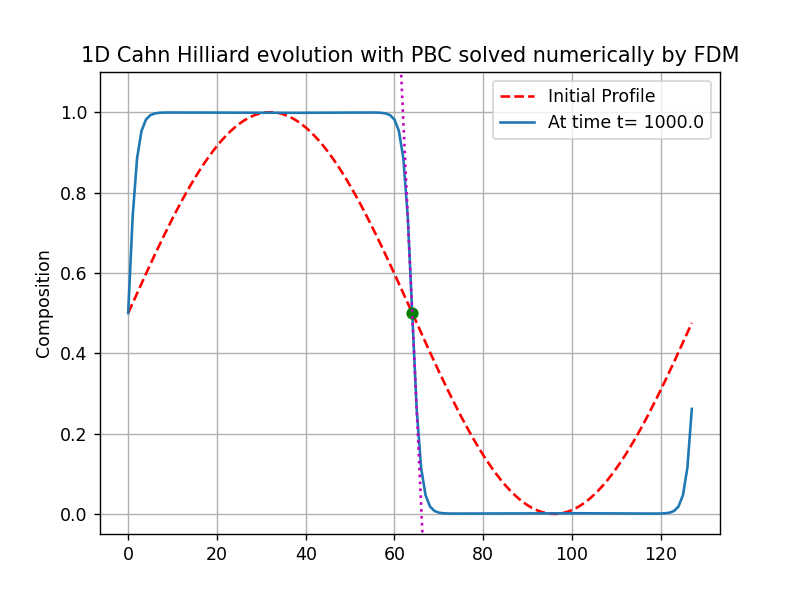

Average composition initially is 0.5
Average composition at time 1000.0 is 0.5000000000000002


In [4]:
%matplotlib notebook
#plt.figure(figsize = (8, 6))

c_integral=[]
count_array=[]

λ= np.arange(0,n)
c= 0.5*(1+np.sin(2*np.pi*λ/(n)))

plt.plot(x,c,'r--',label='Initial Profile')
print('Average composition initially is '+str(np.average(c)))

cch= np.zeros(n)

for t in time:
    count+= 1
    for i in range(n):
        
        if i==0:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1+n)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1+n] + c[i-2*1+n] )
        #When i=0 then i-2= i-2+n   & i-1= i-1+n
        
        elif i==1:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1+n] )
        #When i=1 then i-2= i-2+n   
        
        elif i==(n-2):
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1-n] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1] )
        #When i=n-2 then i+2= i+2-n   
        
        elif i==(n-1):
            cch[i] = c[i] + α*( delf(c,i+1-n)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1-n] - 4*c[i+1-n] + 6*c[i] - 4*c[i-1] + c[i-2*1] )
        #When i=n-1 then i+2= i+2-n & i+1= i+1-n
        
        else:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1] )

            
    c= np.copy(cch)
    
    if (count*Δt)%100 ==0:
        c_integral.append(c)
        count_array.append(count*Δt)
        
plt.plot(x,c,label='At time t= '+str(count*Δt))
print('Average composition at time '+str(count*Δt)+' is '+str(np.average(c)))

a= int((n)/2)
h=1
c_prime=  (c[a+1] - c[a])/h
tangent= c[a] + c_prime*(x-x[a])
#tangent= find_tangent_eqn(c[a], c_prime,a)
plt.plot(a,c[a],'go', x,tangent,'m:')

plt.ylabel('Composition')
plt.title('1D Cahn Hilliard evolution with PBC solved numerically by FDM')
plt.ylim(-0.05,1.1)
plt.grid(True)
plt.legend()
plt.show()

# Finding slope at point 50

In [5]:
m= int((n)/2)
f_slope= (c[m] - c[m+1] )/ (x[m]-x[m+1])
b_slope= (c[m] - c[m-1] )/ (x[m]-x[m-1])
c_slope= (c[m-1] - c[m+1] )/ (x[m-1]-x[m+1])

print(f'Forward slope at point 50 is {abs(f_slope)}\n')
print(f'Backward slope at point 50 is {abs(b_slope)}\n')
print(f'Central slope at point 50 is {abs(c_slope)}')

Forward slope at point 50 is 0.23853398836338308

Backward slope at point 50 is 0.23853398836338313

Central slope at point 50 is 0.2385339883633831



# Finding Interfacial Width

In [6]:
print(f'Interfacial width is {abs(1/f_slope)}')

interface_width = find_width(tangent)
print('the interface width calculated using tangent method is ',interface_width)

Interfacial width is 4.192274681110008
the interface width calculated using tangent method is  4.192274681110007


# Energy Integral

In [7]:
def f(x):
    return A* x**2* (1-x)**2

def slope(comp,i):
    if i==(L-1):
        ans = (comp[0] - comp[i]) / (Δx)
    else:
        ans = (comp[i+1] - comp[i]) / (Δx)
        
    return ans

<IPython.core.display.Javascript object>


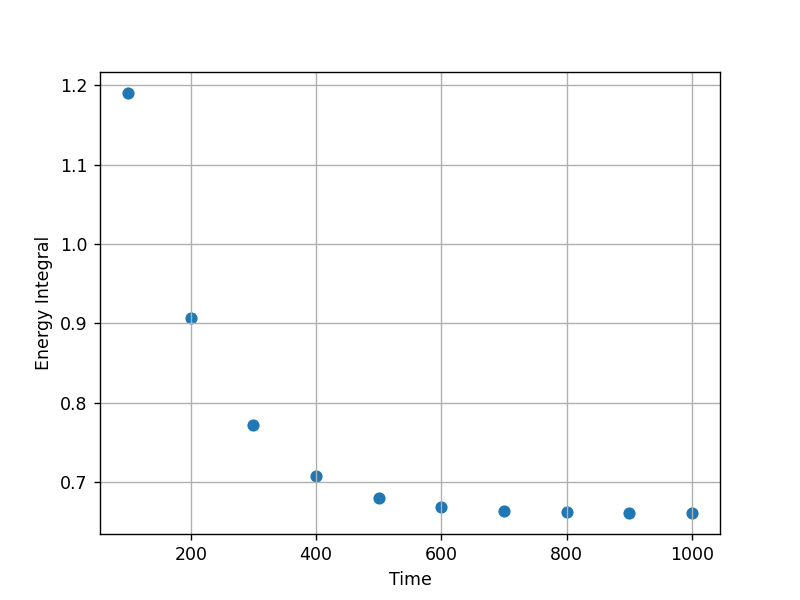

In [9]:
fig=plt.figure()

x= np.arange(0,L,Δx)


Total_energy=[]

for j in range(len(c_integral)):
    energy=0
    for i in range(L):
        
        f_energy= f(c_integral[j][i])
        K_energy= Κ* slope(c_integral[j],i)**2
        
        energy+= (f_energy + K_energy)* Δx
        
    Total_energy.append(energy)

plt.scatter(count_array,Total_energy)
plt.xlabel('Time')
plt.ylabel('Energy Integral')
plt.grid('True')
plt.show()